In [1]:
# September 2021

# Логистическая регрессия

In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Введение

Логистическая регрессия применяется, если целевой признак является бинарным, а признаки - непрерывными и(или) категориальными. 

Условия применения модели:

1) категориальные признаки должны быть закодированы;
2) непрерывные признаки должны быть стандартизированны и приведены к нормальному распределению. В некоторых пособиях указывают, что приведение к нормальному распределению не является обязательным;
3) независимость признаков;
4) наличие линейной зависимости между хотя бы одним признаком и логитом целевого признака;
5) отсутствие мультиколлинеарности между признаками;
6) отсутствие дисбаланса классов.

Нижеследующие замечания предполагают, что вы ознакомились с объяснением логистической регрессии [здесь](https://ru.wikipedia.org/wiki/Логистическая_регрессия)

Общий смысл логистической регрессии следующий:

1) у нас все также есть признаки и целевой признак. При этом целевой признак может быть представлен либо непрерывной величиной, либо категориями. В случае с категориями это могут быть и 0, 1, 2 и другие числа, но они в любом случае отражают категорию. Далее предполагаем, что наш целевой признак - категориальный, причем у нас только две категории: 1 (которая представляет редкую категорию) и 0 (который представляет частую категорию);
2) мы можем предсказать вероятность события: **y** = 1, то есть вероятность появления редкого события. Другими словами, вероятность того, что целевой признак принимает значение 1. Здесь надо помнить, что вероятность во всех случаях не может превышать значение 1. Поэтому вероятность противоположного события, 0 или частая категория, может быть получена как 1 минус вероятность редкого события;
3) в логистической регрессии вместо непосредственного предсказания вероятности мы предсказываем логистическую функцию (отношение шансов). Данная функция в знаменателе содержит параметр z, который представляет из себя линейную функцию. Другими словами, представим таблицу. В этой таблице есть строка, которая отражает одно наблюдение, пускай это будет категория 1, содержащее несколько признаков (столбцов). Возьмем каждое из таких значений и умножим каждое на коэффициент (иначе говорят: взесим признак), составим из совокупности таких взвешенных значений сумму. Мы получили вероятность появления категорий 1 в таблице. Но у нас есть не только категория 1, есть также и категория 0. Проделаем с категорией 0 ту же операцию, а затем умножим вероятность для категории 1 на вероятность для категории 0. В формулах, которые на этом месте приводятся в учебниках, разница между вероятностями для категорий показана за счет возведения в степень. Если y = 1, то вероятность в степени 1 дает вероятность только для категории 1, а если степень **y** - 1, то мы получаем вероятность для категории 0;
4) таким образом мы получаем функцию распределения. Переведем эту функцию в логарифмическую формулу;
5) итак, что мы получили: мы получили полное описание нашего целевого признака с вероятностной точки зрения. Теперь нам необходимо найти коэффициенты в линейной функции. Очевидно, что ничто не мешает нам подставить любые значения коэффициентов. Однако надо помнить, что наша функция распределения - это вероятность появления такой таблицы, в которой в целевом признаке есть определенное количество категорий 1 и категорий 0. Мы заинтересованы в том, чтобы такая вероятность была максимальной. Следовательно мы должны найти такие коэффициенты (так взвесить все значения всех признаков для каждой строки-наблюдения в таблице), чтобы вероятность была максимальной;
5) для этого надо составить функцию распределения, которая может показаться несколько сложной. Однако смысл ее можно понять: в этой функции есть степени - это наш y. Так как y может принимать значение либо 1, либо 0, то степень здесь фактически является показателем того значения, для которого степень указана. В степень возвоздится выражение, которое показывает вероятность наступления события (либо события 1, либо события 0, что показано степенью). Так как у нас в одной ячейке может быть либо 1, либо 0, то функция составлена таким образом, что если y принимает значение 1, то применяется первая часть функции, а если н принимает значение 0, то применяется вторая часть функции. См. также про метод правдоподобия [здесь](https://youtu.be/sO9MJZTxjys);
7) для решения задачи максимизации функции правдоподобия могут быть использованы разные методы, в том числе градиентный спуск.

Мы будем использовать три подхода: 

1) визуальный; 
2) статистический;
3) машинное обучение. 

Визуализировать данные необходимо, так как именно визуально человеку легче схватить какие-то значимые характеристики распределения данных (если, конечно, данные это позволяют). Статистический подход необходим, чтобы понимать, как работает логистическая регрессия "под капотом". Машинное обучение позволяет проводить множество различных манипуляций с данными для улучшения модели предсказания.


## Рекомендуемая литература (все книги, указанные ниже по тексту, также указаны здесь):

1) Сара Бослаф Статистика для всех
2) П. Брюс Практическая статистика для специалистов Data Science
3) С. Рашка, В. Мирджалили Python и машинное обучение
4) "Изучаем Pandas" Майкл Хейдт, Артем Груздев (обязательно второе издание). Лушее описание логистической регрессии из тех, что я читал.

Рекомендуемые книги по математике см. [здесь](https://medium.com/data-science-with-ruslan-nazarov/книги-по-data-science-и-математике-для-начинающих-6257214d82d7)

## Онлайн-ресурсы:

1) [Статья Binary Logistic Regression](https://www.datasklr.com/logistic-regression/logistic-regression-with-binary-target)
2) Хороший материал по решающим деревьям [здесь](https://loginom.ru/blog/decision-tree-p1)

Видео-версия находится [здесь](https://youtu.be/riFcy1Z-VdQ).

Дополнительный полезный код, который может быть применен в том числе к задаче статистического обследования данных, можно также найти в главе 7.


# Получение данных

In [3]:
data = pd.read_csv('D:/Data Science/Проекты/Metod_Goodreads/git_goodreads/gd_augmentation.csv', dtype = {'decade':'object','quarter':'object', 'tra_co':'object', 'multivolume':'object'}) 

In [4]:
# сделаем копию данных
# удалим признаки, которые не будем рассматривать в этом исследовании

db = data.copy()
db = db.drop(['title', 'language_code'], axis=1)

In [5]:
db.head() 

,average_rating,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
0,4.57,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667
1,4.49,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000
2,4.42,352,6333,244,2000,4,0,1,40,0.000000,0.000000
3,4.56,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000
4,4.78,2690,41428,164,2000,3,1,1,34,0.000000,0.000000


In [6]:
db.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,len_title,polarity,subjectivity
count,10838.000000,10838.000000,1.083800e+04,10838.000000,10838.000000,10838.000000,10838.000000
mean,3.942158,344.175217,1.834788e+04,553.074737,30.258719,0.031306,0.149035
std,0.295387,238.556381,1.138660e+05,2599.330244,22.938807,0.193648,0.270061
min,1.000000,11.000000,0.000000e+00,0.000000,2.000000,-1.000000,0.000000
25%,3.770000,203.000000,1.170000e+02,10.000000,15.000000,0.000000,0.000000
50%,3.960000,304.000000,8.035000e+02,49.000000,22.000000,0.000000,0.000000
75%,4.130000,417.000000,5.226750e+03,248.000000,39.000000,0.000000,0.250000
max,5.000000,6576.000000,4.597666e+06,94265.000000,254.000000,1.000000,1.000000


Так как мы занимаеся логистической регрессией, нам необходим дихотамический признак. Точнее, нам нужно превратить **average_rating** в такой признак. Однако здесь есть одна сложность, которую можно увидеть из описания данных. Половина средних оценок выше  3.96 и ниже 3.96. Только 25% оценок больше 4.13. Таким образом, если признать хорошими оценками только 4 и 5, то мы рискуем нашей моделью. Поэтому здесь мы чуть снизим планку для оценки хорошо.

Итак, оценка хорошо - это будет оценка от 3.96. Плохая оценка будет ниже 3.96.

In [7]:
# группы, на которые мы разобьем среднюю оценку

bins = [0, 3.96, 5] 

# название этих групп

groups_names = ['0', '1'] 

# проводим разбиение на группы

db['rating_groups'] = pd.cut(db['average_rating'], bins, labels=groups_names, right=True).astype('int64') 

# удаляем количественный признак, на основании которого построили бинарный
db = db.drop('average_rating', axis=1) 

In [8]:
db.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10838 entries, 0 to 10837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_pages           10838 non-null  int64  
 1   ratings_count       10838 non-null  int64  
 2   text_reviews_count  10838 non-null  int64  
 3   decade              10838 non-null  object 
 4   quarter             10838 non-null  object 
 5   tra_co              10838 non-null  object 
 6   multivolume         10838 non-null  object 
 7   len_title           10838 non-null  int64  
 8   polarity            10838 non-null  float64
 9   subjectivity        10838 non-null  float64
 10  rating_groups       10838 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 931.5+ KB


Проверим, сколько наблюдений содержит каждый класс.

In [9]:
db['rating_groups'].value_counts(normalize=True)

0    0.510611
1    0.489389
Name: rating_groups, dtype: float64

# Ищем простое решение

Всегда нужно исходить из бритвы Оккама: не надо плодить дополнительные сущности. Поэтому сразу проведем проверку наших данных как они есть. 

In [10]:
db

,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity,rating_groups
0,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667,1
1,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000,1
2,352,6333,244,2000,4,0,1,40,0.000000,0.000000,1
3,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000,1
4,2690,41428,164,2000,3,1,1,34,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
10833,512,156,20,2000,4,1,1,48,0.000000,0.000000,1
10834,635,783,56,1980,4,0,0,27,0.700000,0.800000,1
10835,415,820,95,1990,3,0,1,14,0.000000,0.000000,0
10836,434,769,139,2000,1,0,0,11,-0.400000,0.600000,0


In [11]:
#модуль, который позволяет задавать формулу в стиле R

import statsmodels.formula.api as smf 

# вызываем и обучаем модель

model0 = smf.logit('rating_groups ~ num_pages + ratings_count + text_reviews_count +  len_title + polarity + subjectivity + C(multivolume) + C(decade) + C(quarter) + C(tra_co)', data = db).fit() 

Optimization terminated successfully.
         Current function value: 0.665100
         Iterations 5


In [12]:
# вызов результатов модели, обратите внимание, что можно использовать print для красивого вывода

print(model0.summary()) 

                           Logit Regression Results                           
Dep. Variable:          rating_groups   No. Observations:                10838
Model:                          Logit   Df Residuals:                    10819
Method:                           MLE   Df Model:                           18
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                 0.04015
Time:                        15:08:24   Log-Likelihood:                -7208.4
converged:                       True   LL-Null:                       -7509.9
Covariance Type:            nonrobust   LLR p-value:                1.933e-116
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.1735      0.447     -2.623      0.009      -2.050      -0.297
C(multivolume)[T.1]     0.4866      0.047     10.339      0.000       0.394       0.579
C(decade)[T.1950

Вывод выглядит гораздо проще, чем в линейной регрессии. 

**coef** - это коэффициенты при независимых переменных в формуле регрессии, где зависимой переменной выступает логит. 

**P>|z|** - это p-value. Нулевая гипотеза состоит в том, что коэффициент равен нулю.  

**Log-Likelihood** - это натуральный логарифм функции оценки максимального правдоподобия

**LL-Null** - это значение логарифмической вероятности модели, когда независимая переменная не включена (включен только перехват). 

**LLR p-value** - это проверка на принятие нулевой гипотезы: модель, в которой все коэффициенты равны 0, и которая определяется только точкой пересечения с осью y, лучше, чем модель, в которой есть коэффициенты. Мы можем отклонить нулевую гипотезу.

**Pseudo R-squ** - это отношение логарифмической вероятности нулевой модели к полной модели. То же, что коэффициент детерминации в линейной регрессии. Показывает уровень объясненной дисперсии. Чем ближе к 1, тем лучше. У нас это всего 0.024, то есть модель может объяснить только 2,4% дисперсии.

**Z-оценка** - это коэффициент, деленный на стандартную ошибку. Чем ниже, тем лучше.

Коэффициент для **num_pages** составляет 0.0014. Это значит, что для каждого увеличения количества страниц увеличиваются логарифмические шансы (не вероятность, а именно логарифм шанса), что книга имеет положительную оценку.


# Визуальный подход

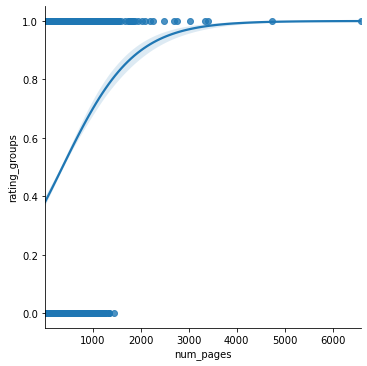

In [13]:
sns.lmplot(x='num_pages', y='rating_groups', data=db, logistic=True)

Интерпретация графика следующая. По оси **x** - количество страниц, по оси **y** - оценка книги. Линия регрессии показывает вероятность получить оценку 1 или 0. Например, мы видим, что при количестве страниц в 1000, вероятность получить оценку 1 близка к 0,6.

# Статистический подход

## Подготовка признаков

В рамках статистического подхода мы поработаем с нашими признаками. Мы будем работать с отдельной копией наших данных. Машинное обучение мы будем проводить на другой копии.

Вот что мы сделаем:

1) укрупним категории. Если категорий в признаке слишком много и они содержат мало наблюдений, то такие категории плохо будут разделять целевой признак на 0 и 1;

2) получим новые признаки;

3) масштабируем наши данные.

Мы не будем здесь удалять выбросы, как делали это в линейной регрессии.

In [14]:
db_stat = db.copy()

### Укрупнение категорий признаков

In [15]:
#количество по категориям в процентном измерении

db_stat['decade'].value_counts(normalize=True) 

2000    0.676509
1990    0.224765
1980    0.056283
1970    0.018454
2010    0.012641
1960    0.006643
1950    0.002676
1940    0.002030
Name: decade, dtype: float64

In [16]:
db_stat['decade'].value_counts() #количество по категориям в абсолютном измерении

2000    7332
1990    2436
1980     610
1970     200
2010     137
1960      72
1950      29
1940      22
Name: decade, dtype: int64

Давайте укрупним категории через объединение 1940 и 1950 с 1960.

In [17]:
db_stat['decade'] = db_stat['decade'].replace(['1950', '1940'], '1960')

In [18]:
db_stat['decade'].value_counts() 

2000    7332
1990    2436
1980     610
1970     200
2010     137
1960     123
Name: decade, dtype: int64

In [19]:
db_stat['quarter'].value_counts(normalize=True)

3    0.263056
4    0.250415
2    0.249769
1    0.236760
Name: quarter, dtype: float64

Распределение по кварталам примерно одинаковое. Поэтому не будем изменять этот признак. Про признаки **tra_co** и **multivolume** стоит отметить, что они разделены всего на две категории.

### Создание новых признаков

In [20]:
db_stat['rating_reviews'] = db_stat['ratings_count'] / db_stat['text_reviews_count']

# в результате деления у нас может возникнуть NaN, заменим его на 1

db_stat['rating_reviews'].replace(np.nan, 1, inplace=True) 

# избавимся от бесконечности

db_stat['rating_reviews'].replace([np.inf, -np.inf], 1, inplace=True) 

Теперь давайте создадим такой признак: среднее значение количества страниц, если у книги есть соавтор/переводчик. Для этого будем использовать функцию.

На вход функция принимает: 

**data** - наши данные;

**cat_feat** - категориальный признак;

**real_feat** - количественный признак.

Функция возвращает новый столбец данных, в котором для каждой группы в категориальных данных определяется среднее количественного признака

In [21]:
def code_mean(data, cat_feat, real_feat):
    return (data[cat_feat].map(data.groupby(cat_feat)[real_feat].mean()))

db_stat['pages_decade'] = code_mean(db_stat, 'decade', 'num_pages')

In [22]:
db_stat

,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity,rating_groups,rating_reviews,pages_decade
0,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667,1,75.955565,341.866067
1,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000,1,73.685603,341.866067
2,352,6333,244,2000,4,0,1,40,0.000000,0.000000,1,25.954918,341.866067
3,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000,1,64.407020,341.866067
4,2690,41428,164,2000,3,1,1,34,0.000000,0.000000,1,252.609756,341.866067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,512,156,20,2000,4,1,1,48,0.000000,0.000000,1,7.800000,341.866067
10834,635,783,56,1980,4,0,0,27,0.700000,0.800000,1,13.982143,371.821311
10835,415,820,95,1990,3,0,1,14,0.000000,0.000000,0,8.631579,351.500411
10836,434,769,139,2000,1,0,0,11,-0.400000,0.600000,0,5.532374,341.866067


Теперь нам надо масштабировать количественные признаки. Для этого можно использовать робастный шкалировщик, так как у нас есть выбросы. Но можно попробовать и несколько других.

Поступим следующим образом: определим признаки, который будем шкалировать, передадим их шкалировщику, заменим исходный признак на масштабированный.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [24]:
# список количественных признаков

col_names = ['num_pages', 'ratings_count', 'text_reviews_count', 'rating_reviews', 'pages_decade', 'len_title', 'polarity', 'subjectivity'] 

# создаем датафрейм с количественными признаками

features = db_stat[col_names] 

# вызываем и обучаем шкалировщик

scaler = QuantileTransformer(n_quantiles=10, random_state=0).fit(features.values) 

# преобразуем наши данные

features = scaler.transform(features.values) 

# применяем результаты

db_stat[col_names] = features 

# Обучение

In [25]:
model = smf.logit('rating_groups ~ num_pages + ratings_count + text_reviews_count +  len_title + polarity + subjectivity + C(multivolume) + C(decade) + C(quarter) + C(tra_co) + rating_reviews + pages_decade', data=db_stat).fit() # вызываем и обучаем модель

Optimization terminated successfully.
         Current function value: 0.657604
         Iterations 5


In [26]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:          rating_groups   No. Observations:                10838
Model:                          Logit   Df Residuals:                    10819
Method:                           MLE   Df Model:                           18
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                 0.05097
Time:                        15:08:43   Log-Likelihood:                -7127.1
converged:                       True   LL-Null:                       -7509.9
Covariance Type:            nonrobust   LLR p-value:                6.726e-151
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.3062   5.24e+04  -2.49e-05      1.000   -1.03e+05    1.03e+05
C(multivolume)[T.1]     0.2775      0.049      5.617      0.000       0.181       0.374
C(decade)[T.1970

Обратите внимание, что увеличилась объясненная дисперсия (0.050) и Log-Likelihood (7127), а также коэффициент при **num_pages** стал 0.6445. 

<AxesSubplot:>

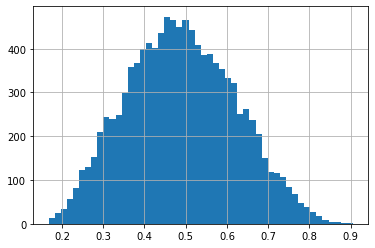

In [27]:
# получаем значения вероятности

proba = 1 / (1 + np.exp( - model.fittedvalues)) 
proba.hist(bins=50)

Эффективная модель делила бы вероятности на два класса, ближе к 0 и к 1. Неэффективная сосредотачивает вероятности возле 0,5.

In [28]:
# оставим только один признак

model1 = smf.logit('rating_groups ~ num_pages', data=db_stat).fit() 

Optimization terminated successfully.
         Current function value: 0.689361
         Iterations 4


In [29]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          rating_groups   No. Observations:                10838
Model:                          Logit   Df Residuals:                    10836
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                0.005140
Time:                        15:08:44   Log-Likelihood:                -7471.3
converged:                       True   LL-Null:                       -7509.9
Covariance Type:            nonrobust   LLR p-value:                 1.548e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3456      0.040     -8.715      0.000      -0.423      -0.268
num_pages      0.6123      0.070      8.759      0.000       0.475       0.749
==============================================================================
"""

In [30]:
model1.params

Intercept   -0.345613
num_pages    0.612274
dtype: float64

Для интерпретации логистической регрессии важно учитывать следующее. Мы получаем регрессионный коэффициент в форме натурального логарифма. Поэтому увеличение или уменьшение такого коэффициента - это увеличение или уменьшение логарифма шанса. Но мы должны перевести его в запись через экспоненту, чтобы получить значение просто шанса. Кроме того, мы можем также получить значение вероятности.

In [31]:
# логарифм шанса - в шанс

model_odds = pd.DataFrame(np.exp(model1.params), columns= ['OR'])
model_odds['z-value']= model1.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model1.conf_int())

model_odds

,OR,z-value,2.5%,97.5%
Intercept,0.707786,2.908202e-18,0.654856,0.764995
num_pages,1.844622,1.971592e-18,1.608443,2.115480


# Машинное обучение. Базовый подход

Применение машинного обучения предполагает ответы на следующие вопросы:

1) Какую модель выбрать? У нас это логистическая регрессия.

2) Как подготовить данные? Наша цель - получить такие признаки, которые будут хорошо разделять целевой признак на 1 и 0. Для этого мы должны преобразовать имеющиеся признаки и получить новые. В рамках этого мы постараемся привести количественные признаки к нормальному распределению и масштабируем данные. Категориальные данные мы закодируем. Как количественные, так и категориальные данные мы разобъем по группам.

3) Какие параметры модели мы будем настраивать и как? Будем использовать решетчатый поиск с кросс-валидацией.

4) Что будет нашей оценкой качества модели? Точность, а также матрица ошибок.

5) Как мы можем получить предсказания по новым данным?


Порядок действий такой:

1) разделяем данные на тренировочный и тестовый наборы;

2) обрабатываем признаки;

3) задаем модель логистической регрессии;

4) тренируем модель с настройкой параметров и оценкой;

5) выбираем лучшую модель;

6) применяем для новых данных.


Важно помнить следующие два обстоятельства:

1) всегда надо стремиться найти самую простую и эффективную модель. Поэтому начинать стоит с базовой.

2) Когда мы готовим наши данные для машинного обучения, мы можем добавлять признаки, очищать их, модифицировать до разделения на тренировочный и тестовый набор или после. До разделения мы можем применять только нематематические методы, которым не требуются расчеты на всем датафрейме. Все иные математические методы, которые требуют расчетов, надо применять только после разделения на тренировочный и тестовый наборы, причем только на тренировочном (с последующим применением результатов и к тестовому).

## Разделяем данные на тренировочный и тестовый наборы

In [32]:
# создаем копию наших данных

db_ml = db.copy() 

In [33]:
# это наши признаки

X = db_ml.drop(['rating_groups'], axis=1)

# это наш целевой признак

y = db_ml['rating_groups'] 

In [34]:
# разделяем данные на тренировочный и тестовый наборы

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 

Обратите внимание, что мы используем stratify, чтобы получить в наших выборках пропорции целевого признака как в генеральной совокупности.

## Подготовка данных

Вот что мы сделаем: 

1) применим кодировщик для категориальных данных;

2) приведем количественные признаки к нормальному распределению; 

3) произведем биннинг; 

4) выполним масштабирование количественных данных;

5) отберем признаки (уменьшим размерность).


Давайте начнем с кодировки категориальных данных. Для этого воспользуемся методом кодирования средним значением зависимой переменной с использованием сглаживания через сигмоидальную функцию по схеме leave-one-out. Это звучит страшно, но на самом деле здесь просто оцениваются вероятности класса для конкретного признака и всего набора, а также применяется сигмоидальная функция. Кроме того, вероятность определяется с вычетом того наблюдения, которое мы непосредственно кодируем. 

### Кодирование категориальных данных

In [35]:
! pip install category_encoders
from category_encoders import TargetEncoder

In [36]:
# вызываем кодировщик и тренируем его на обучающем наборе

encoder = TargetEncoder(cols=['decade', 'quarter', 'tra_co', 'multivolume']).fit(X_train, y_train) 

# применяем к данным тренировочного набора

train_enc = encoder.transform(X_train) 

# для тестового набора мы применяем только transform, не тренируем

test_enc = encoder.transform(X_test) 

C:\Users\runaz\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [37]:
for x in ['decade', 'quarter', 'tra_co', 'multivolume']:
    train_enc[x] = train_enc[x].astype('object')
    test_enc[x] = test_enc[x].astype('object')

In [38]:
test_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252 entries, 145 to 5355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_pages           3252 non-null   int64  
 1   ratings_count       3252 non-null   int64  
 2   text_reviews_count  3252 non-null   int64  
 3   decade              3252 non-null   object 
 4   quarter             3252 non-null   object 
 5   tra_co              3252 non-null   object 
 6   multivolume         3252 non-null   object 
 7   len_title           3252 non-null   int64  
 8   polarity            3252 non-null   float64
 9   subjectivity        3252 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 279.5+ KB


### Приведение количественных признаков к нормальному распределению

Нормальное распределение желательно, но не обязательно. Нормальное распределение нам необходимо, если мы ориентируемся в исследовании на какие-то параметры такого распределения (как, например, при проведении параметрических статистических тестов).

C:\Users\runaz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


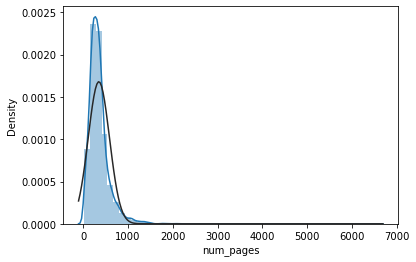

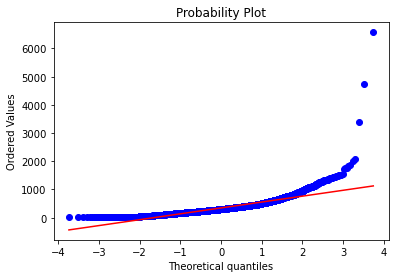

In [39]:
from scipy.stats import norm
from scipy import stats 
sns.distplot(train_enc['num_pages'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_enc['num_pages'], plot=plt)

In [40]:
# скошенность

db_ml['num_pages'].skew() 

4.4888374522680765

In [41]:
# применяем преобразование Бокса-Кокса

train_enc['num_pages'],fitted_lambda = stats.boxcox(train_enc['num_pages']) 

In [42]:
a = 0.0001

# применяем логарифмическое преобразование

train_enc['ratings_count'] = np.log(train_enc['ratings_count'] + a) 

 # применяем логарифмическое преобразование

train_enc['text_reviews_count'] = np.log(train_enc['text_reviews_count'] + a) 

In [43]:
# для тестовой выборки

# применяем преобразование Бокса-Кокса

test_enc['num_pages'] = stats.boxcox(test_enc['num_pages'], fitted_lambda) 

# применяем логарифмическое преобразование

test_enc['ratings_count'] = np.log(test_enc['ratings_count'] + a) 

# применяем логарифмическое преобразование

test_enc['text_reviews_count'] = np.log(test_enc['text_reviews_count'] + a)

### Бининг

Прежде чем мы начнем бининг, нам надо объединить датафрейм с признакми и датафрейм с целевым признаком. Это касается только тренировочного набора.

Про бининг важно помнить, что результатом может стать потеря части информации. Бининг полезен для того, чтобы помочь модели определить нелинейные связи. Таким образом, у этой процедуры есть как минусы, так и плюсы.

In [44]:
x_y_train = train_enc.merge(y_train, left_index=True, right_index=True)

Проводить бининг можно автоматически, например с помощью sklearn.preprocessing.KBinsDiscretizer. Однако лучше использовать ручные методы, чтобы разобраться в происходящем.

Последовательность будет следующая:

1) разделим данные по квантилям;

2) создадим таблицу сопряженности; 

3) создадим таблицу, которая отражает важность полученных групп.

In [45]:
x_y_train['ratings_count_group'] = pd.qcut(train_enc['ratings_count'], 5).astype('object')

# таблица совместного распределения

biv = pd.crosstab(x_y_train['ratings_count_group'], x_y_train['rating_groups']) 

print(biv)

feature,target = 'ratings_count_group','rating_groups'
train_woe_iv = (pd.crosstab(x_y_train[feature],x_y_train[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(train_woe_iv)
print(train_woe_iv['iv'].sum())

rating_groups          0    1
ratings_count_group          
(-9.211, 4.277]      839  689
(4.277, 5.964]       806  704
(5.964, 7.427]       786  729
(7.427, 9.022]       765  751
(9.022, 15.341]      677  840
rating_groups               0         1       woe        iv
ratings_count_group                                        
(-9.211, 4.277]      0.216628  0.185564 -0.154780  0.020127
(4.277, 5.964]       0.208107  0.189604 -0.093116  0.020127
(5.964, 7.427]       0.202943  0.196337 -0.033094  0.020127
(7.427, 9.022]       0.197521  0.202262  0.023719  0.020127
(9.022, 15.341]      0.174800  0.226232  0.257920  0.020127
0.10063741964264059


Таблица сопряженности (первая таблица выше) показывает, как делят квантили наш целевой признак. 

Таблица групп (вторая таблица выше) показывает, насколько важными являются эти группы. Здесь мы получаем показатели мощности наших групп, то есть их способность разделять целевой признак на 1 и 0.

Начнем с woe. Этот показатель в идеале должен идти от отрицательных значений к положительным (или наоборот). Если каждая последующая категория больше предыдущей, то прогнозная сила переменной выше. Категории со схожими значениями woe объединяют.

Сумма IV у нас равна 0.10. Это означает, что признак имеет среднюю предсказательную способность. Высокая идет после 0.3.

Давайте теперь проверим другие признаки.

In [46]:
x_y_train['num_pages_group'] = pd.qcut(train_enc['num_pages'], 5).astype('object')
biv = pd.crosstab(x_y_train['num_pages_group'], x_y_train['rating_groups'])
print(biv)

feature,target = 'num_pages_group','rating_groups'
train_woe_iv = (pd.crosstab(x_y_train[feature],x_y_train[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(train_woe_iv)
print(train_woe_iv['iv'].sum())

rating_groups       0    1
num_pages_group           
(3.462, 12.264]   782  747
(12.264, 13.896]  833  678
(13.896, 15.363]  904  622
(15.363, 16.948]  814  693
(16.948, 40.645]  540  973
rating_groups            0         1       woe        iv
num_pages_group                                         
(3.462, 12.264]   0.201911  0.201185 -0.003600  0.107346
(12.264, 13.896]  0.215079  0.182602 -0.163697  0.107346
(13.896, 15.363]  0.233411  0.167520 -0.331700  0.107346
(15.363, 16.948]  0.210173  0.186642 -0.118741  0.107346
(16.948, 40.645]  0.139427  0.262052  0.631004  0.107346
0.5367323740188422


In [47]:
x_y_train['text_reviews_count_groups'] = pd.qcut(train_enc['text_reviews_count'], 5).astype('object')

biv = pd.crosstab(x_y_train['text_reviews_count_groups'], x_y_train['rating_groups'])
print(biv)

feature,target = 'text_reviews_count_groups','rating_groups'
train_woe_iv = (pd.crosstab(x_y_train[feature],x_y_train[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(train_woe_iv)

print(train_woe_iv['iv'].sum())

rating_groups                0    1
text_reviews_count_groups          
(-9.211, 1.792]            809  742
(1.792, 3.296]             786  709
(3.296, 4.5]               761  748
(4.5, 5.903]               776  738
(5.903, 11.454]            741  776
rating_groups                     0         1       woe        iv
text_reviews_count_groups                                        
(-9.211, 1.792]            0.208882  0.199838 -0.044260  0.002829
(1.792, 3.296]             0.202943  0.190951 -0.060912  0.002829
(3.296, 4.5]               0.196489  0.201454  0.024959  0.002829
(4.5, 5.903]               0.200361  0.198761 -0.008019  0.002829
(5.903, 11.454]            0.191325  0.208995  0.088341  0.002829
0.014143079603546618


In [48]:
x_y_train['text_reviews_count_groups'] = pd.qcut(train_enc['len_title'], 5).astype('object')

biv = pd.crosstab(x_y_train['text_reviews_count_groups'], x_y_train['rating_groups'])
print(biv)

feature,target = 'text_reviews_count_groups','rating_groups'
train_woe_iv = (pd.crosstab(x_y_train[feature],x_y_train[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(train_woe_iv)

print(train_woe_iv['iv'].sum())

rating_groups                0    1
text_reviews_count_groups          
(1.999, 13.0]              912  608
(13.0, 19.0]               953  732
(19.0, 27.0]               740  708
(27.0, 45.0]               639  808
(45.0, 209.0]              629  857
rating_groups                     0         1       woe        iv
text_reviews_count_groups                                        
(1.999, 13.0]              0.235476  0.163749 -0.363276  0.075513
(13.0, 19.0]               0.246062  0.197145 -0.221645  0.075513
(19.0, 27.0]               0.191066  0.190681 -0.002017  0.075513
(27.0, 45.0]               0.164988  0.217614  0.276847  0.075513
(45.0, 209.0]              0.162406  0.230811  0.351496  0.075513
0.37756443346937774


Таким образом, мы разобъем в тренировочном и тестовом наборе данные по количеству страниц и длине названия книги. Обзоры значимой информации не дают. 

In [49]:
# бининг на основе квантилей
# тренировочные данные

train_enc['ratings_count_group'] = pd.qcut(train_enc['len_title'], 5, labels=["1", '2', '3', '4', '5']).astype('object') 
train_enc['num_pages_group'] = pd.qcut(train_enc['num_pages'], 5, labels=["1", '2', '3', '4', '5']).astype('object') 

In [50]:
# бининг на основе квантилей
# тренировочные данные

test_enc['ratings_count_group'] = pd.qcut(test_enc['len_title'], 5, labels=["1", '2', '3', '4', '5']).astype('object')
test_enc['num_pages_group'] = pd.qcut(test_enc['num_pages'], 5, labels=["1", '2', '3', '4', '5']).astype('object') 

In [51]:
train_enc['rating_reviews'] = train_enc['ratings_count'] / train_enc['text_reviews_count'] 
train_enc['rating_reviews'].replace(np.nan, 1, inplace=True)
train_enc['rating_reviews'].replace([np.inf, -np.inf], 1, inplace=True) 

In [52]:
test_enc['rating_reviews'] = test_enc['ratings_count'] / test_enc['text_reviews_count'] 
test_enc['rating_reviews'].replace(np.nan, 1, inplace=True)
test_enc['rating_reviews'].replace([np.inf, -np.inf], 1, inplace=True) 

### Масштабирование

Учитывая наш опыт выше, мы для масштабирования применим QuantileTransformer.

In [53]:
# масштабирование тренировочных данных

col_names = ['num_pages', 'ratings_count', 'rating_reviews', 'len_title', 'polarity', 'subjectivity'] 
features = train_enc[col_names] 
scaler = QuantileTransformer(n_quantiles=10, random_state=0).fit(features.values) 
features = scaler.transform(features.values) 
train_enc[col_names] = features 

In [54]:
# масштабирование тестовых данных

features1 = test_enc[col_names]
features1 = scaler.transform(features1.values)
test_enc[col_names] = features1

# Отбор признаков

Хорошее объяснение процедуры отбора признаков см.  [здесь](http://rasbt.github.io/mlxtend/user_guide/evaluate/feature_importance_permutation/)

Коротко, суть в том, чтобы выбирать признаки в нашем датафрейме и смотреть, как это повлияет на качество оценки. Ниже код приведен только для примера.

In [55]:
train_enc

,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity,ratings_count_group,num_pages_group,rating_reviews
8142,0.095051,0.098044,-9.210340,0.478269,0.465819,0.53537,0.553675,0.472222,0.444444,0.000000,3,1,0.111109
6563,0.277662,0.251694,2.944444,0.478269,0.52224,0.459235,0.46813,0.333333,0.444444,0.000000,2,2,0.458118
8124,0.617081,0.265245,2.708057,0.478269,0.485286,0.459235,0.553675,0.148148,0.444444,0.688940,1,4,0.636619
2819,0.888889,0.768164,5.988962,0.499706,0.52224,0.459235,0.46813,0.370370,0.444444,0.000000,2,5,0.231169
8690,0.373573,0.894707,6.858565,0.478269,0.52224,0.459235,0.553675,0.795322,0.947712,0.975845,4,2,0.294958
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,0.490137,0.520145,4.077539,0.478269,0.52224,0.459235,0.553675,0.407407,0.444444,0.000000,2,3,0.524360
4687,0.817149,0.962917,9.612065,0.541176,0.465819,0.53537,0.46813,0.061728,0.444444,0.000000,1,5,0.171025
1679,0.892249,0.742879,4.510861,0.478269,0.485286,0.459235,0.553675,0.296296,0.444444,0.000000,2,5,0.688251
10093,0.901076,0.850622,6.371612,0.478269,0.465819,0.459235,0.46813,0.444444,0.921569,0.927536,3,5,0.303721


In [56]:
"""

from mlxtend.evaluate import feature_importance_permutation

# список признаков, среди которых мы хотим произвести отбор

col1 = ['num_pages', 'ratings_count', 'text_reviews_count', 'decade', 'quarter','tra_co'] 
forest = RandomForestClassifier(n_estimators=250, random_state=42) 
forest.fit(train_enc[col1], y_train) 
imp_vals, _ = feature_importance_permutation(
    predict_method=forest.predict,
    X = test_enc[col1].values,
    y = y_test.values,
    metric='accuracy',
    num_rounds=10,
    seed=1
)

"""

"\n\nfrom mlxtend.evaluate import feature_importance_permutation\n\n# список признаков, среди которых мы хотим произвести отбор\n\ncol1 = ['num_pages', 'ratings_count', 'text_reviews_count', 'decade', 'quarter','tra_co'] \nforest = RandomForestClassifier(n_estimators=250, random_state=42) \nforest.fit(train_enc[col1], y_train) \nimp_vals, _ = feature_importance_permutation(\n    predict_method=forest.predict,\n    X = test_enc[col1].values,\n    y = y_test.values,\n    metric='accuracy',\n    num_rounds=10,\n    seed=1\n)\n\n"

## Обучение

Давайте запустим обучение на базовых гиперпараметрах.

In [57]:
train_enc

,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity,ratings_count_group,num_pages_group,rating_reviews
8142,0.095051,0.098044,-9.210340,0.478269,0.465819,0.53537,0.553675,0.472222,0.444444,0.000000,3,1,0.111109
6563,0.277662,0.251694,2.944444,0.478269,0.52224,0.459235,0.46813,0.333333,0.444444,0.000000,2,2,0.458118
8124,0.617081,0.265245,2.708057,0.478269,0.485286,0.459235,0.553675,0.148148,0.444444,0.688940,1,4,0.636619
2819,0.888889,0.768164,5.988962,0.499706,0.52224,0.459235,0.46813,0.370370,0.444444,0.000000,2,5,0.231169
8690,0.373573,0.894707,6.858565,0.478269,0.52224,0.459235,0.553675,0.795322,0.947712,0.975845,4,2,0.294958
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,0.490137,0.520145,4.077539,0.478269,0.52224,0.459235,0.553675,0.407407,0.444444,0.000000,2,3,0.524360
4687,0.817149,0.962917,9.612065,0.541176,0.465819,0.53537,0.46813,0.061728,0.444444,0.000000,1,5,0.171025
1679,0.892249,0.742879,4.510861,0.478269,0.485286,0.459235,0.553675,0.296296,0.444444,0.000000,2,5,0.688251
10093,0.901076,0.850622,6.371612,0.478269,0.465819,0.459235,0.46813,0.444444,0.921569,0.927536,3,5,0.303721


In [58]:
logreg = LogisticRegression().fit(train_enc, y_train)

C:\Users\runaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
logreg.coef_

array([[-0.3841649 ,  2.26525844, -0.09980703,  0.86614427,  0.32237684,
         3.48242113,  1.8766682 ,  1.41358017,  0.15262757, -0.01946639,
        -0.04180056,  0.20838391,  1.05741049]])

In [60]:
# логарифм шанса

coef = np.round(logreg.coef_, 3)
feat_labels = train_enc.columns
for c, feature in zip(coef[0], feat_labels):
    print(feature, c)

num_pages -0.384
ratings_count 2.265
text_reviews_count -0.1
decade 0.866
quarter 0.322
tra_co 3.482
multivolume 1.877
len_title 1.414
polarity 0.153
subjectivity -0.019
ratings_count_group -0.042
num_pages_group 0.208
rating_reviews 1.057


Если коэффициент в логарифмической форме положителен, то увеличение значения признака ведет к росту логарифма шанса. Если же коэффициент отрицательный, то увеличение значения признака ведет к уменьшению логарифма шанса.

In [61]:
# экспоненциальные коэффициенты (или просто шанс) 


exp_coef = np.round(np.exp(coef), 3)
feat_labels = X_train.columns
for c, feature in zip(exp_coef[0], feat_labels):
    print(feature, c)

num_pages 0.681
ratings_count 9.631
text_reviews_count 0.905
decade 2.377
quarter 1.38
tra_co 32.525
multivolume 6.534
len_title 4.112
polarity 1.165
subjectivity 0.981


Здесь нужно помнить следующие правила:

1) если экспоненциальный коэффициент больше единицы, то увеличение значения признака ведет к увеличению шанса события;
2) если коэффициент меньше единицы, то увеличение значения признака ведет к уменьшению значения шанса;

## Оценка модели

In [62]:
from sklearn.metrics import (confusion_matrix, accuracy_score)
predict_log = logreg.predict(test_enc) 
confmtrx = np.array(confusion_matrix(y_test, predict_log)) 
data_confus = pd.DataFrame(confmtrx, index=['Плохая_факт', 'Хорошая_факт'], columns=['Плохая_прогноз', 'Хорошая_прогноз']) 
data_confus

,Плохая_прогноз,Хорошая_прогноз
Плохая_факт,1056,605
Хорошая_факт,653,938


В этой таблице левое верхнее значение - это TN (истиноотрицательные результаты), правое верхнее - это FP (ложноположительные результаты), нижнее левое - это FN (ложноотрицательные результаты), првое нижнее - это TP (истиноположительные результаты).

Давайте сначала внимательно посмотрим на эту таблицу. Итак, столбцы - это прогноз нашей модели, строки - это фактические данные. Мы видим, что наша модель 1056 раз предсказала плохую оценку и это совпадает с фактом. Но вот ошиблась в предсказании модель 653 раза. Аналогично, наша модель 938 раз предсказала, что оценка хорошая, что совпало с фактом. Однако и ошиблась модель 605 раз (оценка была плохая, а модель предсказала хорошую). 

Теперь давайте немного отойдем от этой формальности. Что мы здесь получаем? Мы хотели выяснить, какую оценку получает книга, еще точнее - получит ли она хорошую оценку. Но практически одинаково модель ошибается с предсказанием в положительную и отрицательную сторону. Теперь вернемся к формальностям. 

In [63]:
# истинноположительные результаты

TP = data_confus.loc['Хорошая_факт', 'Хорошая_прогноз'] 

# ложноположительные результаты

FP = data_confus.loc['Плохая_факт', 'Хорошая_прогноз'] 

# истиннотрицательные результаты

TN = data_confus.loc['Плохая_факт', 'Плохая_прогноз'] 

# ложноотрицательные результаты

FN = data_confus.loc['Хорошая_факт', 'Плохая_прогноз'] 

In [64]:
from sklearn.metrics import f1_score

TPR=(float(TP) / (TP + FN))
TNR=(float(TN) / (TN + FP)) 
PPV=(float(TP) / (TP + FP)) 
NPV=(float(TN) / (TN + FN)) 
FNR=(float(FN) / (FN + TP))
FPR=(float(FP) / (FP + TN))
FDR=(float(FP) / (FP + TP))
FOR=(float(FN) / (FN + TN))
TS=(float(TP) / (TP+FN + FP))
ACC=(float(TP+TN) / (TP+FP+FN + TN))  
F1=2*TP/(2*TP+FP+FN)

print ("sensitivity, recall, hit rate, or true positive rate (TPR): ",TPR)
print ("specificity, selectivity or true negative rate (TNR): ",TNR)
print ("precision or positive predictive value (PPV): ",PPV)
print ("negative predictive value (NPV): ",NPV)
print ("miss rate or false negative rate (FNR): ",FNR)
print ("fall-out or false positive rate (FPR): ",FPR)
print ("false discovery rate (FDR): ",FDR)
print ("false omission rate (FOR): ",FOR)
print ("Threat score (TS) or Critical Success Index (CSI): ",TS)
print("")
print ("accuracy (ACC): ",ACC)
print ("F1: ",F1)

sensitivity, recall, hit rate, or true positive rate (TPR):  0.5895663104965431
specificity, selectivity or true negative rate (TNR):  0.6357615894039735
precision or positive predictive value (PPV):  0.6079066753078418
negative predictive value (NPV):  0.6179052077238151
miss rate or false negative rate (FNR):  0.41043368950345693
fall-out or false positive rate (FPR):  0.36423841059602646
false discovery rate (FDR):  0.39209332469215813
false omission rate (FOR):  0.3820947922761849
Threat score (TS) or Critical Success Index (CSI):  0.42714025500910746

accuracy (ACC):  0.6131611316113161
F1:  0.5985960433950224


Давайте в этом разбираться по порядку.

**TPR** - это sensitivity (полнота). Отношение того, сколько модель правильно указала правильных положительных ответов. Это говорит нам, насколько точно модель угадывает положительные ответы. У нас всего 0.590.

**TNR** - это специфичность. Отношение того, сколько отрицательных случаев среди всех правильных отрицательных предсказаний. Это говорит нам о склонности модели правильно предсказывать отрицательный результат. У нас это 0.64. То есть наша модель отлично предсказывает отрицательный класс, но плохо предсказывает положительный.

**PPV** - это precision. Отношение того, сколько правильных положительных предсказаний среди всех положительных предсказаний. Это говорит нам, насколько угадывает модель в своих положительных предсказаниях. У нас это 0.61, то есть чуть боле чем в половине случаев положительное предсказание модели оказывается истиной. 

**NPV** - это доля правильных отрицательных предсказаний среди всех отрицательных предсказаний.

**FNR** - это доля ложноотрицательных результатов среди положительных фактических предсказаний.

**FPR** - это доля ложных положительных предсказаний модели среди всех отрицательных фактических результатов. То есть сколько модель не может ухватить отрицательных результатов. У нас это 0.11.

**FDR** - это доля ложноположительных результатов среди всех положительных предсказаний модели. 

**FOR** - это доля ложноотрицательных результатов среди всех отрицательных предсказаний.

**TS**- это доля истинноположительных результатов в сумме положительных фактических результатов и положительных прогнозов.

**ACC** - точность, доля истинных результатов среди всех результатов. У нас это 0.61, что относительно приемлемо, но лучше больше 70%.

**F1** - это доля того, сколько наблюдений, отмеченных как положительные, на самом деле положительные. 


### Кросс-валидация

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
"""

# приводится для примера

print(cross_val_score(logreg, test_enc, y_test, scoring='accuracy', cv=5)) # точность
print(' ')
print(cross_val_score(logreg, test_enc, y_test, scoring='precision', cv=5)) # прецизионность
print(' ')
print(cross_val_score(logreg, test_enc, y_test, scoring='recall', cv=5)) # полнота
print(' ')
print(cross_val_score(logreg, test_enc, y_test, scoring='f1', cv=5)) # f1

"""

"\n\n# приводится для примера\n\nprint(cross_val_score(logreg, test_enc, y_test, scoring='accuracy', cv=5)) # точность\nprint(' ')\nprint(cross_val_score(logreg, test_enc, y_test, scoring='precision', cv=5)) # прецизионность\nprint(' ')\nprint(cross_val_score(logreg, test_enc, y_test, scoring='recall', cv=5)) # полнота\nprint(' ')\nprint(cross_val_score(logreg, test_enc, y_test, scoring='f1', cv=5)) # f1\n\n"

### ROC-Curve

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

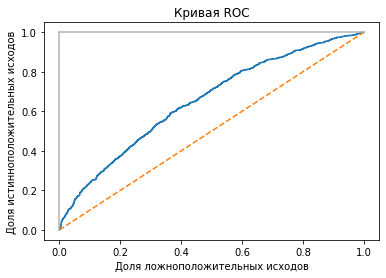

In [68]:
target_probabilities = logreg.predict_proba(test_enc)[:, 1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, target_probabilities)
plt.title('Кривая ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c='.7')
plt.plot([1, 1], c='.7')
plt.ylabel('Доля истинноположительных исходов')
plt.xlabel('Доля ложноположительных исходов')
plt.show()

In [69]:
print('AUC на обучающей выборке: {:.3f}'.format(roc_auc_score(y_train, logreg.predict_proba(train_enc)[:, 1])))
print('AUC на тестовой выборке: {:.3f}'.format(roc_auc_score(y_test, logreg.predict_proba(test_enc)[:, 1])))

AUC на обучающей выборке: 0.646
AUC на тестовой выборке: 0.652


Интерпретация следующая: чем лучше модель, тем ближе синия линия к сплошной линии.

Как строится ROC-кривая? 

1) Сортируем наблюдения по вероятности положительного класса. 
2) На графике по оси абсцисс указываем значения 1-специфичность (цена деления равна 1 делить на количество наблюдений фактического отрицательного класса), по оси ординат указываем чувствительность (цена деления здесь это 1 делить на количество наблюдений фактического положительного класса). 
3) Начинаем с точки 0,0. Если **x** принадлежит положительному классу, то двигаемся на одно деление вверх, если отрицательному - то на одно деление вправо. Точка, которая ближе всего к левому верхнему углу - это точка, которая дает наибольшую правильность классификации.

Считается, что значение roc_auc_curve от 0,9 до 1 - отличное, 0,8 до 0,9 очень хорошее, 0,7-0,8 хорошее, 0,6-0,7 среднее, 0,5 до 0,6 неудовлетворительное.

### График точность-полнота

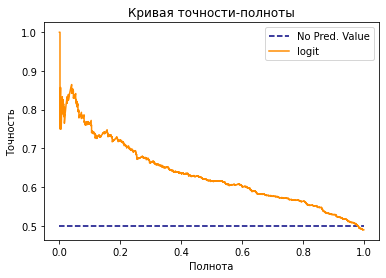

In [70]:
from sklearn.metrics import precision_recall_curve

preds = logreg.predict(test_enc)

y_pred_proba = logreg.predict_proba(test_enc)[::,1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
f1=metrics.f1_score(y_test, preds)
auc=metrics.roc_auc_score(y_test, preds)
plt.plot([0, 1], [0.5, 0.5], color='navy', linestyle='--', label='No Pred. Value')
plt.plot(recall, precision, label='logit', color='darkorange')
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('Кривая точности-полноты')
plt.legend(loc="upper right")
plt.show()

Интерпретация следующая. Полнота (TPR) отражает сколько модель правильно указала истинных положительных ответов, то есть сколько модель реально угадала. Точность (PPV) показывает, сколько истинных результатов среди положительных результатов модели.

Эмпирическое правило. Если положительный класс является редким (или нас больше заботят ложноположительные классификации), необходимо предпочтение отдавать кривой точность-полнота. В остальных случаях - кривой ROC.

### Проверка базовым классификатором

In [71]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(train_enc, y_train)
dummy.score(test_enc, y_test)

0.509840098400984

Оценка для базового классификатора хуже, чем для нашего, но не значительно и остается выше 50%.

In [72]:
# отчет о работе модели

from sklearn.metrics import classification_report
print(classification_report(y_test, predict_log))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1661
           1       0.61      0.59      0.60      1591

    accuracy                           0.61      3252
   macro avg       0.61      0.61      0.61      3252
weighted avg       0.61      0.61      0.61      3252



### Диагностика модели

In [73]:
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7586 entries, 8142 to 3027
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num_pages            7586 non-null   float64
 1   ratings_count        7586 non-null   float64
 2   text_reviews_count   7586 non-null   float64
 3   decade               7586 non-null   object 
 4   quarter              7586 non-null   object 
 5   tra_co               7586 non-null   object 
 6   multivolume          7586 non-null   object 
 7   len_title            7586 non-null   float64
 8   polarity             7586 non-null   float64
 9   subjectivity         7586 non-null   float64
 10  ratings_count_group  7586 non-null   object 
 11  num_pages_group      7586 non-null   object 
 12  rating_reviews       7586 non-null   float64
dtypes: float64(7), object(6)
memory usage: 1.1+ MB


In [74]:
"""

# приводится для примера 

# проверка на мультиколинеарность

# результат не должен быть больше 10


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_temp = sm.add_constant(train_enc) #добавляем константу
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))

"""

'\n\n# приводится для примера \n\n# проверка на мультиколинеарность\n\n# результат не должен быть больше 10\n\n\nimport statsmodels.api as sm\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\nx_temp = sm.add_constant(train_enc) #добавляем константу\nvif = pd.DataFrame()\nvif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]\nvif["features"] = x_temp.columns\nprint(vif.round(1))\n\n'

In [75]:
"""
Влияние размера тренировочного набора
"""

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(max_iter=100), 
                                                        train_enc,
                                                        y_train,
                                                        cv=2,
                                                        scoring='accuracy',
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

C:\Users\runaz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\runaz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\runaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\runaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations 

In [76]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

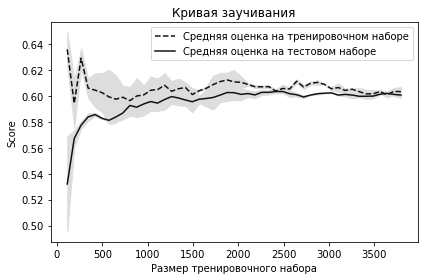

In [77]:
plt.plot(train_sizes, train_scores_mean, '--', color='#111111', label='Средняя оценка на тренировочном наборе') 
plt.plot(train_sizes, test_scores_mean, color="#111111", label='Средняя оценка на тестовом наборе')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, color='#DDDDDD')

plt.title('Кривая заучивания')
plt.xlabel('Размер тренировочного набора')
plt.ylabel('Score')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Интерпретация здесь следующая. Возьмем линию тренировочного набора. Наша оценка точности начинается с высокого значения, так как наблюдений мало и ошибиться сложно. Затем оценка падает в районе 500 наблюдений и закрепляется в этом районе. Тестовый же набор сразу начинает неплохо, а далее линия идет относительно ровно. 

In [78]:
# влияние гипперпараметров 

from sklearn.model_selection import validation_curve
param_range = [10, 230, 1500]
train_scores, test_scores = validation_curve(LogisticRegression(),
                                            test_enc,
                                            y_test,
                                            param_name='max_iter',
                                            param_range=param_range,
                                            cv=10,
                                            scoring='accuracy')

C:\Users\runaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\runaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [79]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [80]:
train_mean

array([0.5735617 , 0.61015464, 0.61015464])

In [81]:
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

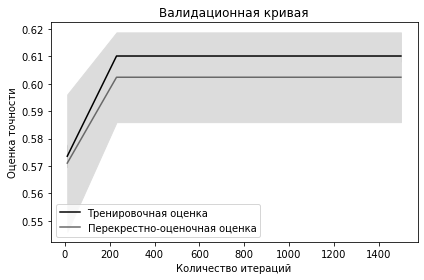

In [82]:
plt.plot(param_range, train_mean, color='black', label='Тренировочная оценка')
plt.plot(param_range, test_mean, color='dimgrey', label='Перекрестно-оценочная оценка')
plt.fill_between(param_range, train_mean - train_std, train_mean+train_std, color='gray')
plt.fill_between(param_range, test_mean-test_std, test_mean+test_std, color='gainsboro')
plt.title('Валидационная кривая')
plt.xlabel('Количество итераций')
plt.ylabel('Оценка точности')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [83]:
# поиск по сетке

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [84]:
strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
parameters={"C":[0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32], "penalty":["l1","l2", 'elasticnet', 'none'], "max_iter":[200, 300, 400], 'class_weight': ['balanced']}
grid = GridSearchCV(logreg, parameters, scoring='roc_auc', return_train_score=True, cv=strat) # по умолчанию cv=5
grid.fit(train_enc, y_train)

C:\Users\runaz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\runaz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\runaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\runaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\runaz\anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32],
                         'class_weight': ['balanced'],
                         'max_iter': [200, 300, 400],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             return_train_score=True, scoring='roc_auc')

In [85]:
# получаем лучший параметр

print(grid.best_params_) 
print(" ")
print(grid.best_score_)

{'C': 0.18, 'class_weight': 'balanced', 'max_iter': 400, 'penalty': 'none'}
 
0.6449526249571829


# Дерево решений

Сейчас мы посмотрим как работают деревья решений и так называемые ансамблевые методы, когда применяется несколько деревьев и проводится голосование. Два основных типа ансамблей - бэггинг и бустинг. 

Бэггинг предполагает создание нескольких деревьев. Каждое дерево тренируется на наборе данных, который извлечен из наших базовых наборов путем отбора наблюдений и признаков.

Бустинг предполагает также создание нескольких деревьев. Но деревья тренируются не параллельно, а последовательно. Причем на каждом последующем шаге учитываются результаты предыдущего. 

Рекомендую ознакомиться с этими методами по книге Практическая статистика для специалистов Data Science (Питер Брюс, Эндрю Брюс). Хороший материал по деревьям [здесь](https://loginom.ru/blog/decision-tree-p1)

Здесь мы будем работать с нашими изначальными данными без всякой обработки, кроме кодирования. 

В данном случае не стоит цель объяснить механизм работы деревьев решений. Материал носит больше справочный характер. 

Коротко смысл алгоритма в следующем. Для всех признаков и всех наблюдений определяем точки расщепления (значения больше и меньше этой точки). Для каждой смотрим меру однородности, как правило через коэффициент Джинни. Выбираем точку с большей однородностью. Это будет наш узел, который разбивает данные на две группы. Применяем к каждой новой группе тот же механизм.

Деревья могут применяться как к дихотамическим, так и непрерывным целевым признакам. В этом случае вместо коэффициента Джинни или энтропии для расщепления применяется MSE.

Важные понятия:

1) корневой узел – узел, с которого мы начинаем расщепление;
2) листовой узел  - узел, который не имеет дочерних узлов.




In [86]:
X = db.drop('rating_groups', axis=1)
y = db['rating_groups']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 

In [87]:
from sklearn.tree import DecisionTreeClassifier

# запустим модель на базовых гиперпараметрах

decision_tree = DecisionTreeClassifier() 

# тренируем модель

decision_tree = decision_tree.fit(X_train, y_train) 

# оценка модели на тренировочных данных

print(accuracy_score(decision_tree.predict(X_train), y_train)) 
print(' ')

# оценка модели на тестовых данных

print(accuracy_score(decision_tree.predict(X_test), y_test)) 

1.0
 
0.5710332103321033


Обратите внимание, что мы получили оценку на тренировочном наборе 1. Почему? Потому что мы никак не ограничили нашу модель и она переобучилась. В этом слабость деревьев решений. Поэтому нужна настройка гиперпараметров.

In [88]:
# настройка модели

params1 = {'max_depth':[10, 20], 'criterion': ['gini', 'entropy']}
grid1 = GridSearchCV(decision_tree, params1, cv=5)
grid1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20]})

In [89]:
print(grid1.best_params_)
print("")
print(grid1.best_score_)

{'criterion': 'gini', 'max_depth': 10}

0.5993939567640523


In [90]:
decision_tree1 = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_leaf_nodes= 2, min_samples_split= 2) 
decision_tree1 = decision_tree.fit(X_train, y_train) 
print(accuracy_score(decision_tree1.predict(X_train), y_train)) 
print(' ')
print(accuracy_score(decision_tree1.predict(X_test), y_test)) 

1.0
 
0.5701107011070111


На практике рекомендуется min_samples_leaf брать от 5. 

## Визуализация дерева

In [92]:
"""

# приводится для примера

# визуализация деревьев хороша, когда мало признаков
# в противном случае прочитать эти данные практически невозможно

from IPython.display import Image
from sklearn import tree
import pydotplus
import graphviz
import os 

dot_data = tree.export_graphviz(decision_tree, out_file=None, class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

"""

'\n\n# приводится для примера\n\n# визуализация деревьев хороша, когда мало признаков\n# в противном случае прочитать эти данные практически невозможно\n\nfrom IPython.display import Image\nfrom sklearn import tree\nimport pydotplus\nimport graphviz\nimport os \n\ndot_data = tree.export_graphviz(decision_tree, out_file=None, class_names=True)\ngraph = pydotplus.graph_from_dot_data(dot_data)\nImage(graph.create_png())\n\n'

# Случайный лес

Случайный лес отбирает не только наблюдения, но и признаки. Признаки отбираются бутстрапом, то есть с возвращением. Первый отбор признаков осуществляется случайно. Далее в каждом признаке и по каждому наблюдению проводится разбиение на большие и меньшие значения. Измеряется однородность классов внутри каждого подсегмента. Выбирается такое значение, которое порождает максимальную внутрисегментную однородность класса. На этом основании выбираем признак и точку разбиения, которая порождает максимальную однородность внутри сегмента. Далее переходим к следующему разбиению и повторяем эти шаги. Повторять, пока дерево не будет выращено. После чего вернуться в самое начало, взять еще одну бутстраповскую выборку и все повторить. 

Как правило, отбирается количество признаков, равное корню квадратном из числа признаков.

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [94]:
forest_reg = RandomForestClassifier(n_estimators=300)
forest_reg.fit(X_train, y_train)
predictions = forest_reg.predict(X_train)
forest_acc = accuracy_score(predictions, y_train)
forest_acc

1.0

In [95]:
predictions_test = forest_reg.predict(X_test)
forest_acc_test = accuracy_score(predictions_test, y_test)
forest_acc_test

0.6306888068880688

# AdaBoost

In [96]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
adaboost = AdaBoostClassifier()
model_ada = adaboost.fit(X_train, y_train)
predictions = model_ada.predict(X_train)
ada_acc = accuracy_score(predictions, y_train)
ada_acc

0.6374901133667282

In [98]:
predictions_test = model_ada.predict(X_test)
forest_acc_test = accuracy_score(predictions_test, y_test)
forest_acc_test

0.6316113161131611

# Использование различных моделей

In [99]:
from sklearn.ensemble import VotingClassifier

In [100]:
voting_clf = VotingClassifier(estimators=[('lr', logreg), ('rf', forest_reg), ('ab', adaboost)], voting='hard')
voting_clf.fit(X_train, y_train)
for clf in (logreg, forest_reg, voting_clf, adaboost):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.4892373923739237
RandomForestClassifier 0.6334563345633456
VotingClassifier 0.6300738007380073
AdaBoostClassifier 0.6316113161131611


# Приложение

Способы кодирования категориальных переменных:

1) дамми-кодирование с помощью pd.get_dummies(). С неполным рангом – это n признаков кодируется. С полным рангом – это n-1 признак кодируется;

2) кодирование контрастами (Effect Coding) – опорный уровень устанавливается в -1;

3) кодирование в лексикографическом порядке целочисленных значений, начиная с 0 (Label Encoding). Используют для порядковых переменных;

4) кодирование по частоте наблюдений в категории переменных (Frequency Encoding). Используется только после разбиения на обучающую и контрольную выборки. Применяют как правило относительную частоту, а не абсолютную;

5) кодирование вероятностями зависимой переменной (Likelihood Encoding). Используют только после разбиения на тренировочные и тестовые данные. Для улучшения используют среднее значение, сглаженное через сигмоидальную функцию. Сглаживание применяется только на обучающей выборке. Следующий метод здесь – это кодировка средним значением зависимой переменной, сглаженным через параметр регуляризации. Еще – кодировка простым средним значением зависимой переменной по схеме leave-one-out; кодировка простым средним значением зависимой переменной по схеме k-fold; кодировка средним значением зависимой переменной, сглаженным через сигмоидальную функцию, по схеме k-fold;

6) присвоение категориям в зависимости от порядка их появления целочисленных значений, начиная с 1 (Ordinal Encoding).
